In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency



In [8]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products = pd.read_csv('order_products_s.csv')
orders = pd.read_csv('orders_s.csv')
products = pd.read_csv('products.csv')
tips = pd.read_csv('tips.csv')



In [ ]:
# Verknüpfe Tipps mit Bestellungen
orders = orders.merge(tips, on='order_id', how='left')
orders.dropna()  


# Spalte für vorherige und vor-vorherige Trinkgeldangaben
orders['tip_prev'] = orders.groupby('user_id')['tip'].shift(1)
orders['tip_prev2'] = orders.groupby('user_id')['tip'].shift(2)
orders['tip_prev'] = orders['tip_prev'].astype(bool)
orders['tip_prev2'] = orders['tip_prev2'].astype(bool)



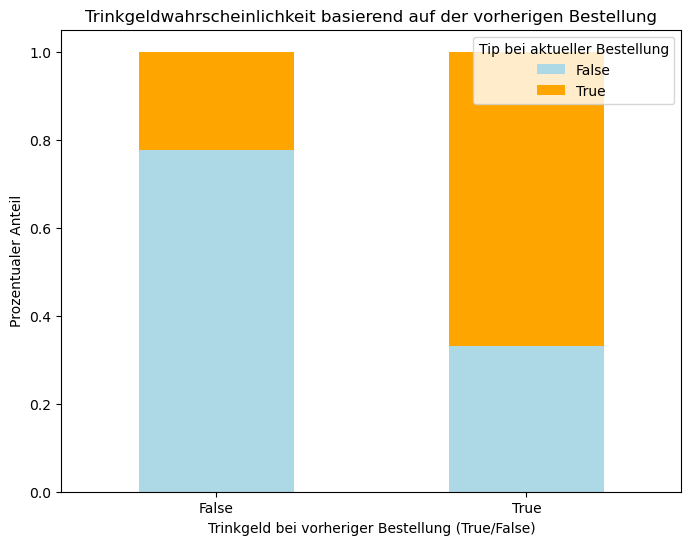

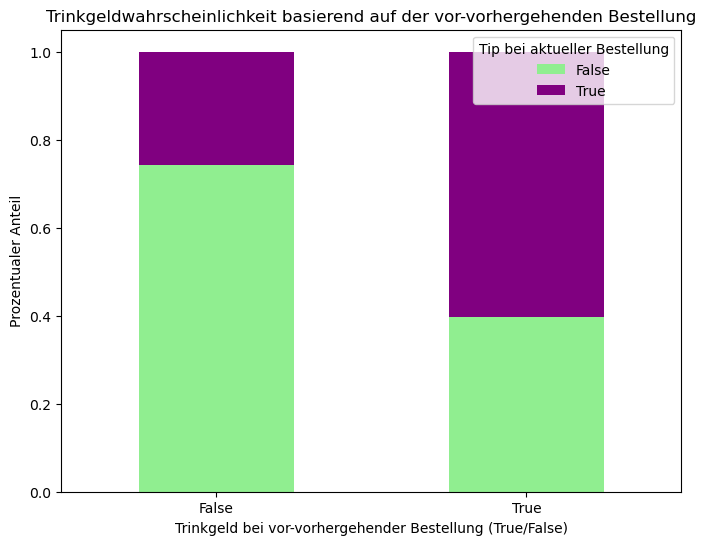

Chi-Quadrat-Test Ergebnisse für `tip_prev`:
Chi2-Wert: 337077.06541183114, p-Wert: 0.0
tip und tip_prev sind nicht unhabhängig .

Chi-Quadrat-Test Ergebnisse für `tip_prev2`:
Chi2-Wert: 203165.2077822456, p-Wert: 0.0
tip und tip_prev2 sind nicht unhabhängig .


In [10]:
# 4. Analyse
# a) Häufigkeiten und Wahrscheinlichkeiten basierend auf `tip_prev`
tip_prev_counts = pd.crosstab(orders['tip_prev'], orders['tip'], normalize='index')

# b) Häufigkeiten und Wahrscheinlichkeiten basierend auf `tip_prev2`
tip_prev2_counts = pd.crosstab(orders['tip_prev2'], orders['tip'], normalize='index')

# c) Chi-Quadrat-Test: Prüft den Zusammenhang zwischen `tip_prev` und `tip`
contingency_table_prev = pd.crosstab(orders['tip_prev'], orders['tip'])
chi2_prev, p_prev, dof_prev, expected_prev = chi2_contingency(contingency_table_prev)

# c) Chi-Quadrat-Test: Prüft den Zusammenhang zwischen `tip_prev2` und `tip`
contingency_table_prev2 = pd.crosstab(orders['tip_prev2'], orders['tip'])
chi2_prev2, p_prev2, dof_prev2, expected_prev2 = chi2_contingency(contingency_table_prev2)

# 5. Visualisierungen
# a) Trinkgeldwahrscheinlichkeit nach `tip_prev`
tip_prev_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'orange'])
plt.title('Trinkgeldwahrscheinlichkeit basierend auf der vorherigen Bestellung')
plt.xlabel('Trinkgeld bei vorheriger Bestellung (True/False)')
plt.ylabel('Prozentualer Anteil')
plt.xticks(rotation=0)
plt.legend(title='Tip bei aktueller Bestellung')
plt.show()

# b) Trinkgeldwahrscheinlichkeit nach `tip_prev2`
tip_prev2_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightgreen', 'purple'])
plt.title('Trinkgeldwahrscheinlichkeit basierend auf der vor-vorhergehenden Bestellung')
plt.xlabel('Trinkgeld bei vor-vorhergehender Bestellung (True/False)')
plt.ylabel('Prozentualer Anteil')
plt.xticks(rotation=0)
plt.legend(title='Tip bei aktueller Bestellung')
plt.show()

# c) Chi-Quadrat-Testergebnisse
print("Chi-Quadrat-Test Ergebnisse für `tip_prev`:")
print(f"Chi2-Wert: {chi2_prev}, p-Wert: {p_prev}")
if p_prev < 0.05:
    print("tip und tip_prev sind nicht unhabhängig .")
else:
    print("tip und tip_prev sind nicht unhabhängig .")

print("\nChi-Quadrat-Test Ergebnisse für `tip_prev2`:")
print(f"Chi2-Wert: {chi2_prev2}, p-Wert: {p_prev2}")
if p_prev2 < 0.05:
    print("tip und tip_prev2 sind nicht unhabhängig .")
else:
    print("tip und tip_prev2 sind unhabhängig .")


In [11]:
print(expected_prev)
print(chi2_prev)
print(dof_prev)

[[493264.32111253 381944.67888747]
 [449643.67888747 348168.32111253]]
337077.06541183114
1


In [12]:
contingency_table = pd.crosstab(orders['tip_prev'], orders['tip'])

# Drucke die Kreuztabelle
print("Kreuztabelle (Beobachtete Häufigkeiten):")
print(contingency_table)
print(expected_prev)

# Berechne die Prozentuale Verteilung (optional)
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
print("\nProzentuale Verteilung:")
print(percentage_table)

Kreuztabelle (Beobachtete Häufigkeiten):
tip        False   True 
tip_prev                
False     679280  195929
True      263628  534184
[[493264.32111253 381944.67888747]
 [449643.67888747 348168.32111253]]

Prozentuale Verteilung:
tip           False      True 
tip_prev                      
False     77.613461  22.386539
True      33.043875  66.956125
